In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# Note: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

coordinates = list(lat_lngs)
coordinates

[(-50.43276204847386, -135.85485683622892),
 (-29.22408609550343, -173.79755839337778),
 (-83.26064735338541, 34.45170744765784),
 (-66.93281623116656, -65.09791986479398),
 (-40.89933414781743, -36.31184888667326),
 (-85.6956417556192, 4.28019220803543),
 (8.992830958496768, -26.230379503044674),
 (-21.788452607080345, -76.0273033560324),
 (-15.17482819980502, -146.08966818161306),
 (-31.456129552926306, -63.27852360186343),
 (-47.99857550404186, 16.153589507059905),
 (-88.04752935551294, -27.149516086716716),
 (39.84679211325525, 29.291741028138205),
 (-55.041638308188595, -89.62287925288366),
 (9.802246570367672, -3.254852517900332),
 (-63.81693976410606, 130.47942022336667),
 (3.857590683834232, 24.1943256378394),
 (-20.47853699595568, -84.05845505805827),
 (-68.14097519884923, 107.05533917852779),
 (-16.14353345441242, 173.3561652062386),
 (-68.93997042370383, 36.07070046499618),
 (14.770621298964059, 143.19788286268505),
 (82.79984754256822, -158.6584346067005),
 (-64.47998544505

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
import requests
import time
from datetime import datetime
api_key = "26e27adb85e630b46b1b3b676bdb887d"

url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid="+api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities with try and except, they should be within the for loop.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 27 | rikitea
Processing Record 2 of Set 27 | vaini
Processing Record 3 of Set 27 | port elizabeth
Processing Record 4 of Set 27 | ushuaia
Processing Record 5 of Set 27 | cidreira
Processing Record 6 of Set 27 | hermanus
Processing Record 7 of Set 27 | sao filipe
Processing Record 8 of Set 27 | tocopilla
Processing Record 9 of Set 27 | tautira
Processing Record 10 of Set 27 | cordoba
Processing Record 11 of Set 27 | inegol
Processing Record 12 of Set 27 | punta arenas
Processing Record 13 of Set 27 | batie
Processing Record 14 of Set 27 | new norfolk
Processing Record 15 of Set 27 | bondo
Processing Record 16 of Set 27 | pisco
Processing Record 17 of Set 27 | albany
Processing Record 18 of Set 27 | vila
Processing Record 19 of Set 27 | port alfred
Processing Record 20 of Set 27 | airai
Processing Record 21 of Set 27 | barrow
Processing Record 22 of Set 27 | hobart
Processing Record 23 of Set 27 | morondava
Processing Record 24 of Set 27 | busselton
Processing 

Processing Record 38 of Set 30 | zhanaozen
Processing Record 39 of Set 30 | saint-francois
Processing Record 40 of Set 30 | alyangula
Processing Record 41 of Set 30 | sibolga
Processing Record 42 of Set 30 | zhanakorgan
Processing Record 43 of Set 30 | leningradskiy
Processing Record 44 of Set 30 | clyde river
Processing Record 45 of Set 30 | sorong
Processing Record 46 of Set 30 | labuhan
Processing Record 47 of Set 30 | ust-kuyga
Processing Record 48 of Set 30 | yialos
City not found. Skipping...
Processing Record 49 of Set 30 | severo-kurilsk
Processing Record 50 of Set 30 | telgte
Processing Record 1 of Set 31 | kodinsk
Processing Record 2 of Set 31 | innisfail
Processing Record 3 of Set 31 | benguela
Processing Record 4 of Set 31 | iqaluit
Processing Record 5 of Set 31 | oksfjord
Processing Record 6 of Set 31 | warqla
City not found. Skipping...
Processing Record 7 of Set 31 | yairipok
Processing Record 8 of Set 31 | bilibino
Processing Record 9 of Set 31 | reo
Processing Record 1

Processing Record 22 of Set 34 | lavrentiya
Processing Record 23 of Set 34 | umm lajj
Processing Record 24 of Set 34 | half moon bay
Processing Record 25 of Set 34 | praya
Processing Record 26 of Set 34 | kokopo
Processing Record 27 of Set 34 | tiarei
Processing Record 28 of Set 34 | lao cai
Processing Record 29 of Set 34 | isangel
Processing Record 30 of Set 34 | aykhal
Processing Record 31 of Set 34 | salalah
Processing Record 32 of Set 34 | baruun-urt
Processing Record 33 of Set 34 | bundaberg
Processing Record 34 of Set 34 | akureyri
Processing Record 35 of Set 34 | marcona
City not found. Skipping...
Processing Record 36 of Set 34 | rawson
Processing Record 37 of Set 34 | mjolby
Processing Record 38 of Set 34 | grand gaube
Processing Record 39 of Set 34 | hoquiam
Processing Record 40 of Set 34 | san cristobal
Processing Record 41 of Set 34 | puerto madero
Processing Record 42 of Set 34 | trinidad
Processing Record 43 of Set 34 | valdez
Processing Record 44 of Set 34 | mega
Process

Processing Record 7 of Set 38 | luwuk
Processing Record 8 of Set 38 | najran
Processing Record 9 of Set 38 | coromandel
Processing Record 10 of Set 38 | soyo
Processing Record 11 of Set 38 | lazaro cardenas
Processing Record 12 of Set 38 | portland
Processing Record 13 of Set 38 | san carlos de bariloche
Processing Record 14 of Set 38 | raudeberg
Processing Record 15 of Set 38 | rio grande
Processing Record 16 of Set 38 | la asuncion
Processing Record 17 of Set 38 | felidhoo
City not found. Skipping...
Processing Record 18 of Set 38 | mullovka
Processing Record 19 of Set 38 | samarai
Processing Record 20 of Set 38 | turka
Processing Record 21 of Set 38 | grobenzell
Processing Record 22 of Set 38 | songea
Processing Record 23 of Set 38 | ahipara
Processing Record 24 of Set 38 | warwick
Processing Record 25 of Set 38 | maneadero
Processing Record 26 of Set 38 | porto velho
Processing Record 27 of Set 38 | kirakira
Processing Record 28 of Set 38 | broome
Processing Record 29 of Set 38 | p

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pasni,25.2631,63.4710,301.12,41,0,8.30,PK,2022-03-31 14:38:40
1,Pasni,25.2631,63.4710,299.75,28,0,6.79,PK,2022-04-01 00:07:15
2,Rikitea,-23.1203,-134.9692,298.10,71,38,7.79,PF,2022-04-01 00:08:42
3,Vaini,-21.2000,-175.2000,300.46,76,100,3.21,TO,2022-04-01 00:08:42
4,Port Elizabeth,-33.9180,25.5701,292.09,81,95,5.81,ZA,2022-04-01 00:08:42
5,Ushuaia,-54.8000,-68.3000,280.52,85,99,3.69,AR,2022-04-01 00:08:43
6,Cidreira,-30.1811,-50.2056,288.87,69,68,2.09,BR,2022-04-01 00:08:43
7,Hermanus,-34.4187,19.2345,288.60,69,98,4.41,ZA,2022-04-01 00:08:43
8,Sao Filipe,14.8961,-24.4956,295.58,73,20,3.66,CV,2022-04-01 00:08:44
9,Tocopilla,-22.0920,-70.1979,292.81,74,19,3.23,CL,2022-04-01 00:08:44


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pasni,PK,2022-03-31 14:38:40,25.2631,63.4710,301.12,41,0,8.30
1,Pasni,PK,2022-04-01 00:07:15,25.2631,63.4710,299.75,28,0,6.79
2,Rikitea,PF,2022-04-01 00:08:42,-23.1203,-134.9692,298.10,71,38,7.79
3,Vaini,TO,2022-04-01 00:08:42,-21.2000,-175.2000,300.46,76,100,3.21
4,Port Elizabeth,ZA,2022-04-01 00:08:42,-33.9180,25.5701,292.09,81,95,5.81
...,...,...,...,...,...,...,...,...,...
646,Mujiayingzi,CN,2022-04-01 00:28:47,42.1167,118.7833,274.45,24,10,2.07
647,Strezhevoy,RU,2022-04-01 00:28:48,60.7333,77.5889,256.71,100,89,1.99
648,Piacabucu,BR,2022-04-01 00:28:48,-10.4056,-36.4344,298.65,82,50,2.13
649,Baker City,US,2022-04-01 00:28:48,44.7749,-117.8344,281.26,40,0,9.26


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# # Export the city_data into csv. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [24]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1648823362.462844

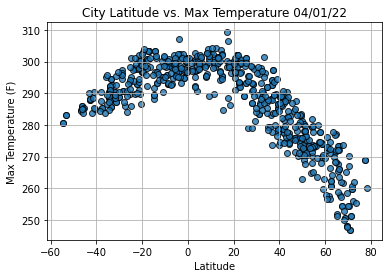

In [25]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

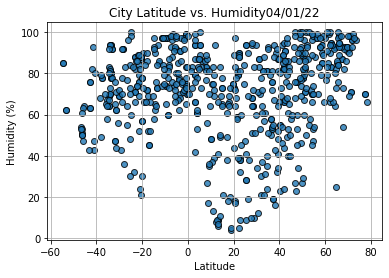

In [28]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

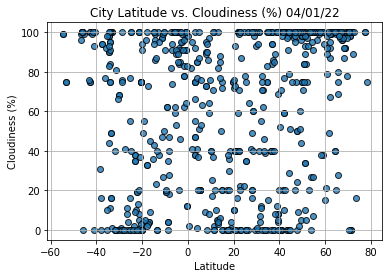

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()


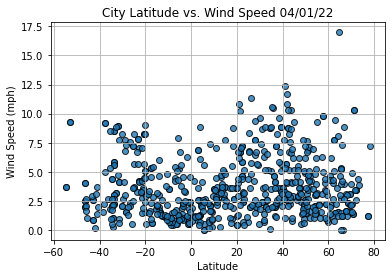

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig4.png")

plt.show()